In [1]:
# Исследование ошибки по эталону.

In [2]:
# Шаг 1 - зависимости
import attractor
from attractor import Attractor, compare
import matplotlib.pyplot as plt
import numpy as np
import copy

In [3]:
del compare

In [4]:
from attractor import compare

In [5]:
# Шаг 2 - функция возвращающая примую найденную методом наименьших квадратов
# Роль ошибки играет коэф наклона m (Далее он называется K). Инвариант должен быть неизменен, потому в теории K == 0. Это позволяет рассматривать эксперементальное K != 0 как значение ошибки
def lse(dots):
    x = dots[1]
    y = dots[0]
    A = np.vstack([x, np.ones(len(x))]).T
    m, c = np.linalg.lstsq(A, y, rcond=None)[0]
    return m,c


In [6]:
# РАБОТА С ЭТАЛОНОМ

In [338]:
# Параметры эталона и другие 
diff_arr = [[],[]] # Массив точек
inv = 5 #  Номер инварианта для оценки метода. В работе используется 5
eth_method = 'ABM5'  # Исследуемый метод. В работе выбран метод ABM5
rg = 10.0  # Расстояние, на котором производится исследование. Его увеличение пропорционально увеличит время.
eth_step = 0.00001
eth_num_steps = int(rg/eth_step)
print(eth_num_steps)

999999


In [9]:
# Расчет по эталону
eth_AL1 = Attractor(step=eth_step, num_steps=eth_num_steps)
eth_AL1.set_invariant_params(inv)
eth_AL1.iterator_method(eth_method)
eth_calls = eth_AL1.get_counter()
print("calls_f: ", eth_calls)
eth_dots = eth_AL1.getDots()

123456789
calls_f:  18999936


In [10]:
# Cut thirds
l = int(eth_dots.shape[1] * (1.0 / 3.0))
eth_dots = eth_dots[:, l:-l]
print(eth_dots.shape)

(4, 333334)


In [11]:
# РАБОТА С СРАВНИМВАЕМЫМ

In [339]:
# methods = ["EUL1","MIDP2", "RK4", "AB4", "AM4", "ABM5"]
method = 'ABM5'  # Исследуемый метод

In [371]:
# Параметры исследуемого метода
num_steps = 3000
# step = 0.0001
# num_steps = int(rg/step)
step = rg/num_steps
print(step)


0.0033333333333333335


In [372]:
# Расчет по исследуемому методу
cmp_AL1 = Attractor(step=step, num_steps=num_steps)
cmp_AL1.set_invariant_params(inv)
cmp_AL1.iterator_method(method)
cmp_calls = cmp_AL1.get_counter()
print("calls_f: ", cmp_calls)
cmp_dots = cmp_AL1.getDots()

123456789
calls_f:  56955


In [373]:
# Cut thirds
l = int(cmp_dots.shape[1] * (1.0 / 3.0))
cmp_dots = cmp_dots[:, l:-l]
print(cmp_dots.shape)

(4, 1001)


In [374]:
err = compare(eth_dots,cmp_dots, adopt_time_scale = True)

In [375]:
# Err cut fifths
l = int(err.shape[1] * (1.0 / 5.0))
err = err[:, l:-l]
print(err.shape)

(2, 600)


In [376]:
M = np.mean(err[0])
print(cmp_calls)
print(M)

56955
3.861987146432024e-10


In [377]:
diff_arr[0].append(cmp_calls)
diff_arr[1].append(M)

[18955, 28455, 37955, 47455, 56955]
[9.799667415074947e-08, 1.2775862335754605e-08, 3.014832235657804e-09, 9.826406895326632e-10, 3.861987146432024e-10]


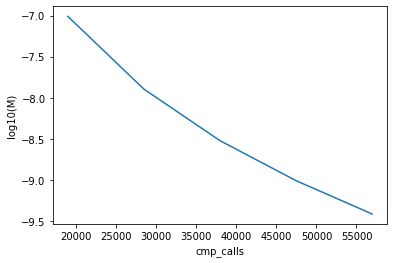

In [378]:
print(diff_arr[0])
print(diff_arr[1])
plt.xlabel("cmp_calls")
plt.ylabel("log10(M)")
plt.plot(np.abs(diff_arr[0]),np.log10(np.abs(diff_arr[1])))

[2.54990045e-09 2.54987304e-09 2.54984577e-09 ... 8.88311288e-11
 8.88275468e-11 8.88238386e-11]
[3.99999 4.      4.00001 ... 5.99998 5.99999 6.     ]


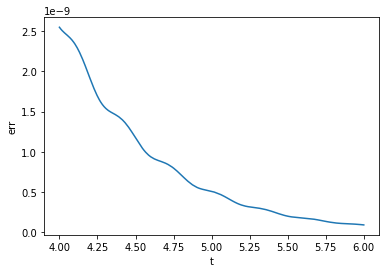

In [57]:
print(err[0])
print(err[1])
plt.xlabel("t")
plt.ylabel("err")
plt.plot(err[1],err[0])

In [62]:

arr[0].append(step)
arr[1].append(K)

In [16]:
throw Exeption()
# __arr1 = copy.deepcopy(arr)

SyntaxError: invalid syntax (<ipython-input-16-412383e43e1d>, line 1)

In [ ]:
# Шаг 5 - Расчет
eth_AL1 = Attractor(step=step, num_steps=num_steps)
eth_AL1.set_invariant_params(inv)
eth_AL1.iterator_method(method)
eth_calls = AL1.get_counter()
print("calls_f: ", calls)

# Get inv func
I, err = AL1.get_invariant_err(inv, dt=0.000001)

# Cut thirds
l = int(I.shape[1] * (1.0 / 3.0))
I = I[:, l:-l]
err = err[:, l:-l]
txt = f'{method}@{inv}#{calls}'

M = np.mean(I[0])
D = np.std(I[0] - M)
K, C = lse(I)

# arr[0].append(step)
# arr[1].append(K)
print(step)
print(K)

[0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06]
[4.856410520041255, 0.0001469092709565499, 1.6073182163714313e-09, 4.078104183139979e-12, -7.947776087557896e-13, 6.239155613013155e-11]


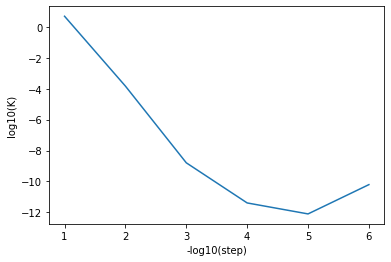

In [69]:
# Шаг7 - Построения графика ошибки от размера шага. При слишком маленьком шаге произойдет численное насыщение и ошибка начнет расти
print(arr[0])
print(arr[1])
plt.xlabel("-log10(step)")
plt.ylabel("log10(K)")
plt.plot(-np.log10(np.abs(arr[0])),np.log10(np.abs(arr[1])))